## **Graded Challenge 4**

### **A. Introduction**

- **Name**  : Livia Amanda Annafiah
- **Batch** : BSD-005
- **Dataset** : [Uber and Lyft Dataset Boston, MA](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma?resource=download)

---------------------

**Problem Statement**

A ride-hailing company is currently facing a significant challenge as the cost of rides tends to fluctuate unexpectedly. This unpredictability arises from a range of dynamic factors that influence pricing. Such unpredictability makes it hard for users to know how much they'll need to pay in advance, often leading to frustration and a loss of trust when the final price is higher than expected.

To address this, the company aims to improve the accuracy of their price prediction algorithms. By offering more reliable price forecasts, they seek to enhance user trust and satisfaction, strengthening their position in a competitive market.

**Objective**  

This project aims to develop a `Linear Regression` model designed for predicting ride-hailing prices accurately based on selected features. The evaluation metrics will include `MAE (Mean Absolute Error)`, `MSE (Mean Squared Error)`, `RMSE (Root Mean Squared Error)`, and `R2 score` to assess the model's performance and predictive accuracy.

### **B. Libraries**

The libraries used to develop the model are as follows:

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import phik

# Import libraries for data preprocessing and model creation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV, ShuffleSplit

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import libraries for managing warnings
import warnings

**Libraries Function**
- pandas: data manipulation and analysis
- numpy: numerical computations and operations on arrays
- matplotlib : data visualization and statistical plotting
- seaborn: data visualization and statistical plotting
- pickle: saving model
- json: handling JSON data format for data interchange and storage
- phik: feature selection
- sklearn: machine learning algorithms, model creation, feature engineering, and evaluation
- warnings: remove warning messages

### **C. Data Loading & Cleaning**

#### **i. Data Loading**

This section will focus on loading the data and exploring its contents. The inital step involves loading the data and take a quick look of the data.

In [4]:
# Load dataset
df_ori = pd.read_csv('rideshare_kaggle.csv')

# Duplicate dataset
df = df_ori.copy()

# Show the first 5 data
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


The dataset shows 57 columns containing information about customers' ride details, including details about weather conditions, sources, destinations, type of cab, and more.  Certain columns likely correlate with and impact the pricing.

The table offers a brief description of each column within the dataframe, simplifying the understanding process.

<center>

| Column Name                  | Description                                                  |
|----------------------------- |--------------------------------------------------------------|
| id                           | Unique identifier for each data entry.                        |
| timestamp                    | Time at which the data was recorded.                          |
| hour                         | Hour of the timestamp.                                        |
| day                          | Day of the timestamp.                                         |
| month                        | Month of the timestamp.                                       |
| datetime                     | Combined date and time of the timestamp.                      |
| timezone                     | Time zone of the recorded data.                               |
| source                       | Starting point of the trip.                                   |
| destination                  | Ending point of the trip.                                     |
| cab_type                     | Category of the cab (e.g., luxury, single).                   |
| product_id                   | Identifier for the cab type.                                  |
| name                         | Same as cab_type, denotes the category of the cab.            |
| price                        | Cost of the trip.                                             |
| distance                     | Distance traveled.                                            |
| surge_multiplier             | Multiplier applied to the fare during peak times.             |
| latitude                     | Latitude coordinate of a location.                            |
| longitude                    | Longitude coordinate of a location.                           |
| temperature                  | Temperature at the time of the trip.                          |
| apparentTemperature          | Perceived temperature.                                        |
| short_summary                | Brief description of the weather conditions.                  |
| long_summary                 | Detailed description of the weather conditions.               |
| icon                         | Weather icon representing the weather conditions.             |
| precipIntensity              | Intensity of precipitation.                                   |
| precipProbability            | Probability of precipitation occurring.                       |
| humidity                     | Humidity level.                                               |
| windSpeed                    | Speed of the wind.                                            |
| windGust                     | Gust speed of the wind.                                       |
| windGustTime                 | Time at which the wind gust occurred.                         |
| visibility                   | Visibility level.                                             |
| temperatureHigh              | Highest temperature of the day.                               |
| temperatureHighTime          | Time at which the highest temperature occurred.               |
| temperatureLow               | Lowest temperature of the day.                                |
| temperatureLowTime           | Time at which the lowest temperature occurred.                |
| apparentTemperatureHigh      | Highest perceived temperature.                                |
| apparentTemperatureHighTime  | Time at which the highest perceived temperature occurred.      |
| apparentTemperatureLow       | Lowest perceived temperature.                                 |
| apparentTemperatureLowTime   | Time at which the lowest perceived temperature occurred.       |
| dewPoint                     | Dew point temperature.                                        |
| pressure                     | Atmospheric pressure.                                         |
| windBearing                  | Wind direction in degrees.                                    |
| cloudCover                   | Percentage of sky covered by clouds.                          |
| uvIndex                      | UV index level.                                               |
| visibility.1                 | Another measure of visibility.                                |
| ozone                        | Ozone level.                                                  |
| sunriseTime                  | Time of sunrise.                                              |
| sunsetTime                   | Time of sunset.                                               |
| moonPhase                    | Phase of the moon.                                            |
| precipIntensityMax           | Maximum precipitation intensity.                              |
| uvIndexTime                  | Time at which the UV index was recorded.                      |
| temperatureMin               | Minimum temperature of the day.                               |
| temperatureMinTime           | Time at which the minimum temperature occurred.               |
| temperatureMax               | Maximum temperature of the day.                               |
| temperatureMaxTime           | Time at which the maximum temperature occurred.               |
| apparentTemperatureMin       | Minimum perceived temperature.                                |
| apparentTemperatureMinTime   | Time at which the minimum perceived temperature occurred.     |
| apparentTemperatureMax       | Maximum perceived temperature.                                |
| apparentTemperatureMaxTime   | Time at which the maximum perceived temperature occurred.     |


To gain more insights into the dataframe's information, method `info()` is used.

In [3]:
# Check data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

The dataset has **693,071 rows** and **57 columns**. Most columns are complete, except for the `price` column, which is missing 55,095 values. Fortunately, there's no need to change any data types since they're already correct.

To streamline future processes, these columns will be separated according to their types.

<center>

| **Category**  | **Type**     | **Column Names**                                           |
|---------------|--------------|------------------------------------------------------------|
| **Categorical** | **Ordinal**   | `surge_multiplier`                                         |
|               | **Nominal**   | `id`, `timestamp`, `datetime`, `timezone`, `product_id`,  |
|               |              | `name`, `short_summary`, `long_summary`, `icon`,           |
|               |              | `source`, `destination`, `cab_type`, `windGustTime`        |
| **Numerical**   | **Discrete**  | `hour`, `day`, `month`, `price`                            |
|               | **Continuous**| `distance`, `latitude`, `longitude`, `temperature`,       |
|               |              | `apparentTemperature`, `precipIntensity`,                 |
|               |              | `precipProbability`, `humidity`, `windSpeed`, `windGust`,  |
|               |              | `visibility`, `pressure`, `temperatureHigh`,               |
|               |              | `temperatureHighTime`, `temperatureLow`,                   |
|               |              | `temperatureLowTime`, `apparentTemperatureHigh`,           |
|               |              | `apparentTemperatureHighTime`, `apparentTemperatureLow`,   |
|               |              | `apparentTemperatureLowTime`, `dewPoint`, `windBearing`,    |
|               |              | `cloudCover`, `uvIndex`, `ozone`, `sunriseTime`,            |
|               |              | `sunsetTime`, `moonPhase`, `precipIntensityMax`,           |
|               |              | `uvIndexTime`, `temperatureMin`, `temperatureMinTime`,     |
|               |              | `temperatureMax`, `temperatureMaxTime`,                    |
|               |              | `apparentTemperatureMin`, `apparentTemperatureMinTime`,    |
|               |              | `apparentTemperatureMax`, `apparentTemperatureMaxTime`     |



The method `describe` is then used to provide a summary of the statistical attributes such as mean, standard deviation, minimum, maximum, and quartile values for each column in a dataset.

In [4]:
# Check descriptive statistictis
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


The dataset shows that the mean values are generally close to the median values across several columns, indicating a relatively symmetric distribution for most variables. However, there is a notable difference in some columns like `price` where the mean is higher than the median, suggesting a right-skewed distribution with some higher-priced outliers.

Looking at the range values (minimum and maximum), there is significant variability in certain columns like `price`, `distance`, and `temperature`. This indicates diverse conditions and situations captured in the dataset, from short, inexpensive rides to longer, costlier ones, and from cooler temperatures to warmer conditions.

In [5]:
# Check total unique values
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

To determine the number of unique values in each column of a dataset, the `nunique` method is used. The data shows a variety of unique values in different columns. Some columns have many unique values, showing a lot of variation, while others have fewer, indicating more uniform data. Columns like `id` and `timestamp` are unique for each entry, meaning they are used to individually identify each record.

In [6]:
# Check total of duplicated rows
df.duplicated().sum()

0

The method `duplicated().sum()` checks for the total number of duplicated rows in the dataset. It indicates that there are no duplicates, confirming that all rows are unique. Therefore, there's no need to remove any duplicated rows.

In [7]:
# Check missing values
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

The method `isnull().sum()` is used to identify and count missing values in each column of the dataset. For instance, it was previously mentioned that the `price` column has some missing values. This method helps quantify those missing entries, which is essential for deciding how to handle them, whether by filling in the gaps or removing the affected rows. Since `price` is the target variable, these missing values need to be dropped. 

In [8]:
# Check column names
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

To display all column names in the dataset, method `columns` is used. The dataset includes a variety of details such as time, ride information (`source`, `destination`, etc.), and weather conditions (`temperature`, `humidity`, etc.). It also contains data on location (`latitude`, `longitude`) and other environmental factors (`wind speed`, `precipIntensity`, etc.). This range of information is useful for understanding how different factors might influence the price.

In [9]:
# # Iterate through each pair of columns to check duplicated column
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2 and all(df[col1] == df[col2]):
            print(f"Columns '{col1}' and '{col2}' have the same values.")

Columns 'visibility' and 'visibility.1' have the same values.
Columns 'visibility.1' and 'visibility' have the same values.


To determine if any columns in the dataset have identical values, a loop is used for comparison. This process revealed that the columns `visibility` and `visibility.1` contain the same values across all entries. Removing one of these columns will eliminate redundancy.

#### **ii. Data Cleaning**

This section will focus on cleaning the founded mistakes from the previous section. However, missing values will be handled in the further sections.

Since the previous analysis confirmed that there are no duplicated rows and no need to change data types or column names, the only issue remaining is to remove the redundant column `visibility.1` using `drop` method.

In [10]:
# Drop duplicated columns
df = df.drop(columns=['visibility.1'])

#### **iii. Data Checking**

This section aims to verify whether the data cleaning process has been completed correctly. To confirm the removal of specific columns, such as `visibility.1`, the `columns` method can be used to display the current list of columns in the dataset. 

In [11]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'appare

The absence of the column `visibility.1` confirms that it has been successfully removed from the dataset.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

For a final verification, the `info()` method is used again to check everything. The result shows that the number of columns are now 56, compared to the previous count of 57. This step ensures that the dataset has been accurately updated and that all necessary changes.

### **D. Exploratory Data Analysis (EDA)**

In this section, the data will be visually explored using plots like bar charts and heatmap. These visualizations help reveal patterns and trends, offering valuable insights into the dataset's structure and characteristics.

#### **i. Number of Trips each Cab**

The first section is to check the total number of trips for each type of cab.

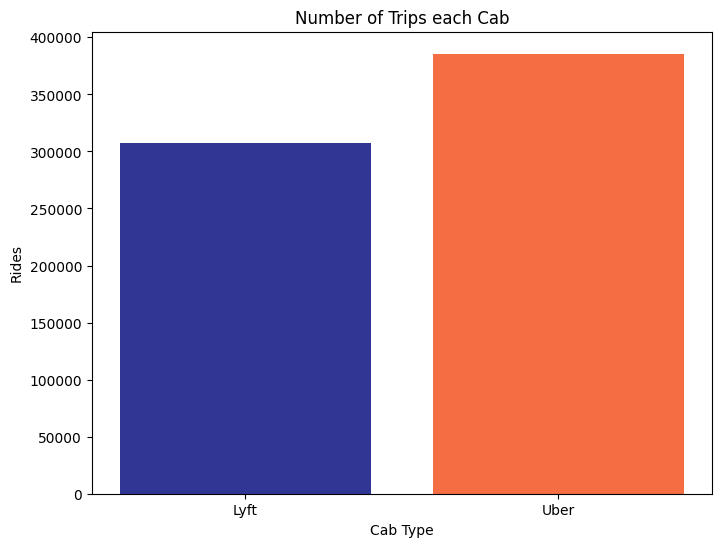

In [13]:
# Define cab_type
cab = df.groupby('cab_type').size()

# Choose a color from the RdYlBu colormap
color1 = plt.cm.RdYlBu(1.5)
color2 = plt.cm.RdYlBu(0.2)

# Plot the graph
plt.figure(figsize=(8, 6))
plt.bar(cab.index, cab.values, color=(color1,color2))
plt.xlabel('Cab Type')
plt.ylabel('Rides')
plt.title('Number of Trips each Cab')
plt.show()

The bar chart indicates the total number of rides based on cab type. Lyft shows approximately 300,000 rides, while Uber has around 390,000 rides. This suggests a higher preference for Uber over Lyft among users.

#### **ii. Number of Trips per Hour**

This section aims to display the total number of trips for each hour of the day to observe the distribution.

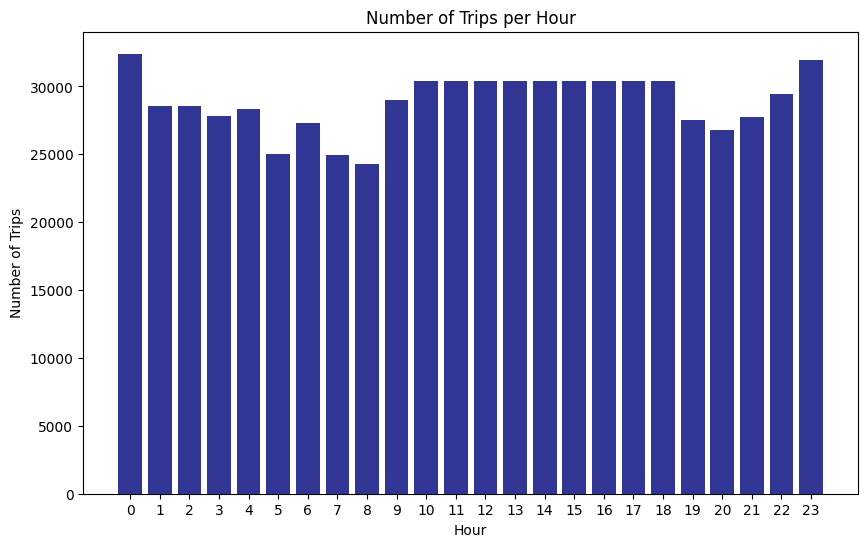

In [14]:
# Define hour
hour = df.groupby('hour').size()

# Choose a color from the RdYlBu colormap
color = plt.cm.RdYlBu(1.5)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(hour.index, hour.values, color=color)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Hour')

# Set the ticks of the y-axis to show all numbers of hour
plt.xticks(hour.index, [str(h) for h in hour.index])

plt.show()

The bar chart illustrates the distribution of rides throughout the day, highlighting fluctuations in demand. The demand for cabs is at its lowest around 9 AM, indicating a minimum activity during early morning hours. However, demand steadily rises as the day progresses, peaking significantly between 11 PM and 12 AM. This significant increase in demand during late hours is followed by a consistent level of activity during business hours, from 10 AM to 6 PM.

#### **iii. Price Correlation**

These visualization focuses on exploring how price correlates with other columns to determine if there are any significant correlations. A heatmap will be used to visualize these correlations efficiently.

##### **Ride Category**

The first step is to check how price correlates with columns representing ride details, such as `hour`, `day`, `distance`, etc.

<Axes: >

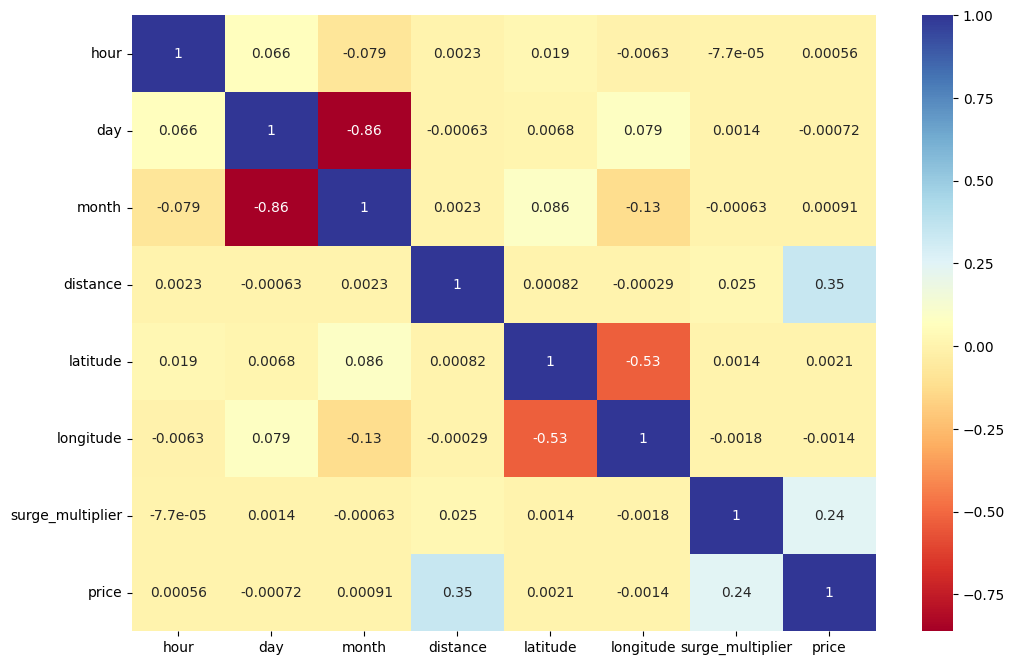

In [15]:
f_corr = ['hour', 'day', 'month', 'distance', 'latitude', 'longitude', 'surge_multiplier', 'price']

cor1 = df[f_corr].corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor1,annot=True,cmap='RdYlBu')

There is a quite strong correlation between `price` and `distance`, as well as between `price` and `surge_multiplier`. This suggests that these factors may have an impact on the price of the ride. Other columns show minimal correlations with price.

##### **Temperature Category**

The next step is to examine whether temperature affects pricing.

<Axes: >

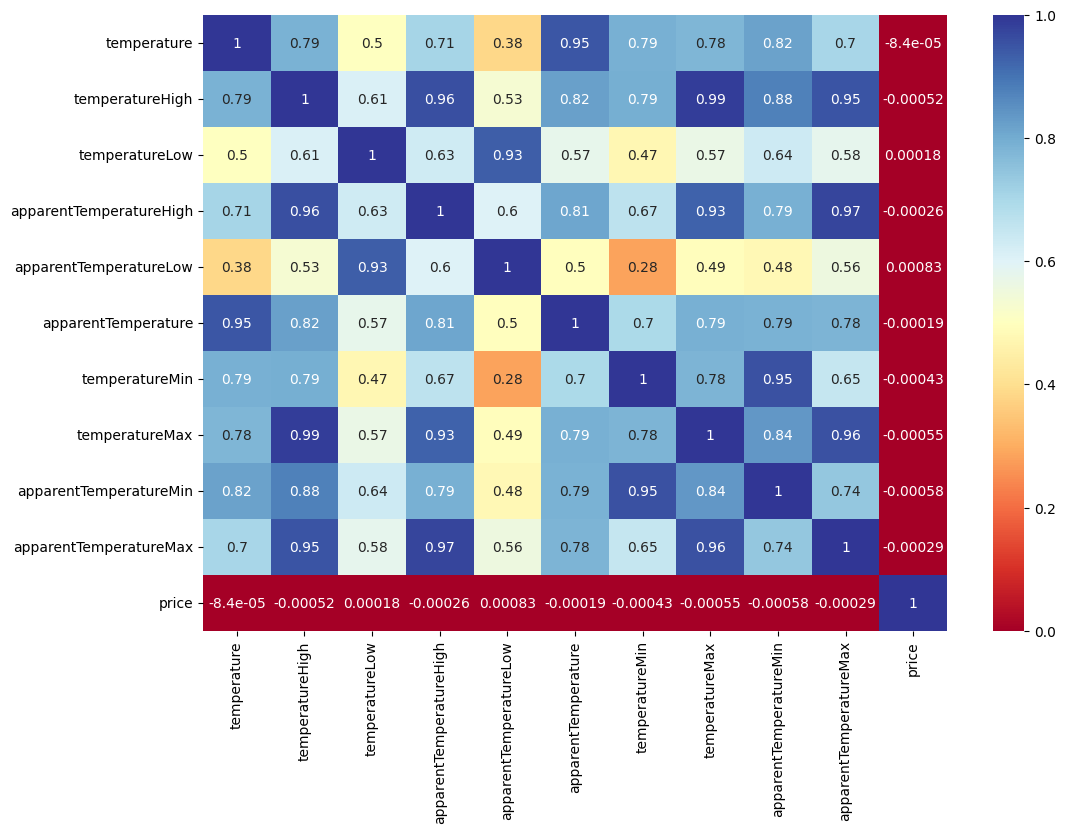

In [16]:
f_corr = ['temperature', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow','apparentTemperature', 
          'temperatureMin','temperatureMax','apparentTemperatureMin', 'apparentTemperatureMax', 'price']

cor2 = df[f_corr].corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor2,annot=True,cmap='RdYlBu')

The heatmap reveals that temperature-related columns has minimal impact on pricing, as the correlation is very weak and close to zero.

##### **Weather Category**

The final analysis involves examining whether weather conditions affect pricing. From a logical standpoint, bad weather typically leads to higher demand, resulting in price increases due to surge multipliers.

<Axes: >

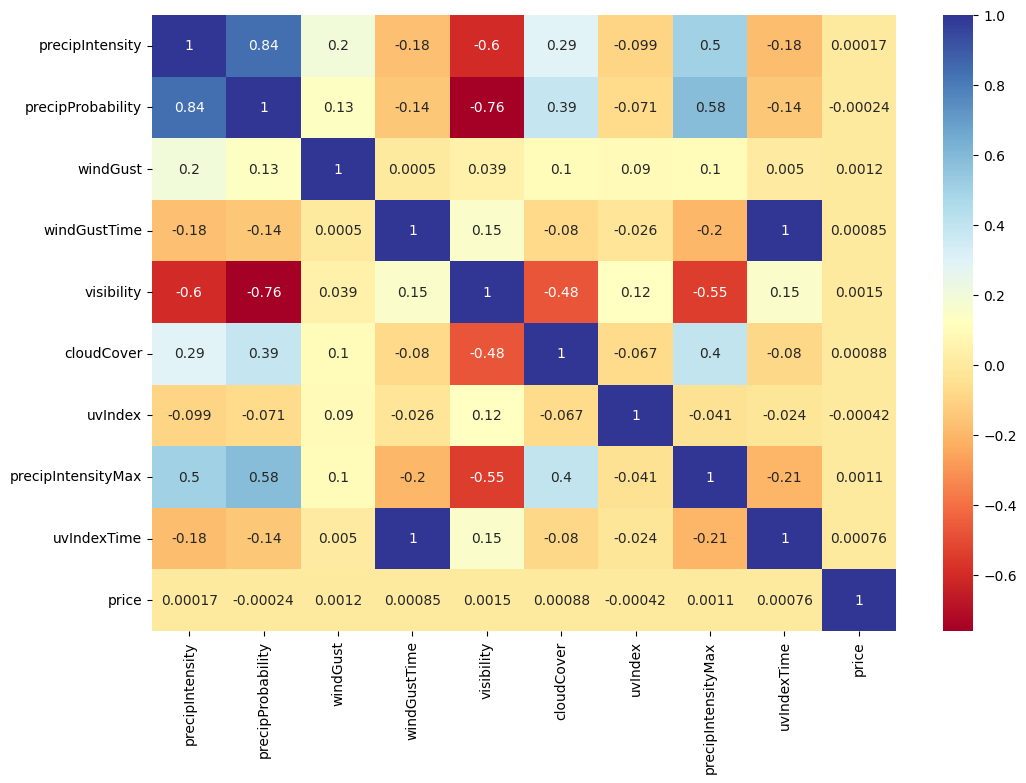

In [17]:
f_corr = ['precipIntensity', 'precipProbability', 'windGust', 'windGustTime', 'visibility', 'cloudCover', 'uvIndex',
          'precipIntensityMax', 'uvIndexTime', 'price']

cor4 = df[f_corr].corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor4,annot=True,cmap='RdYlBu')

However, the analysis indicates that weather conditions have almost no effect on pricing, as the correlation is also very low and close to zero.

#### **iv. Average Prices by Source and Destination**

This section focuses on examining the average price from pick-up locations to drop-off locations to determine if there are differences in prices among locations.

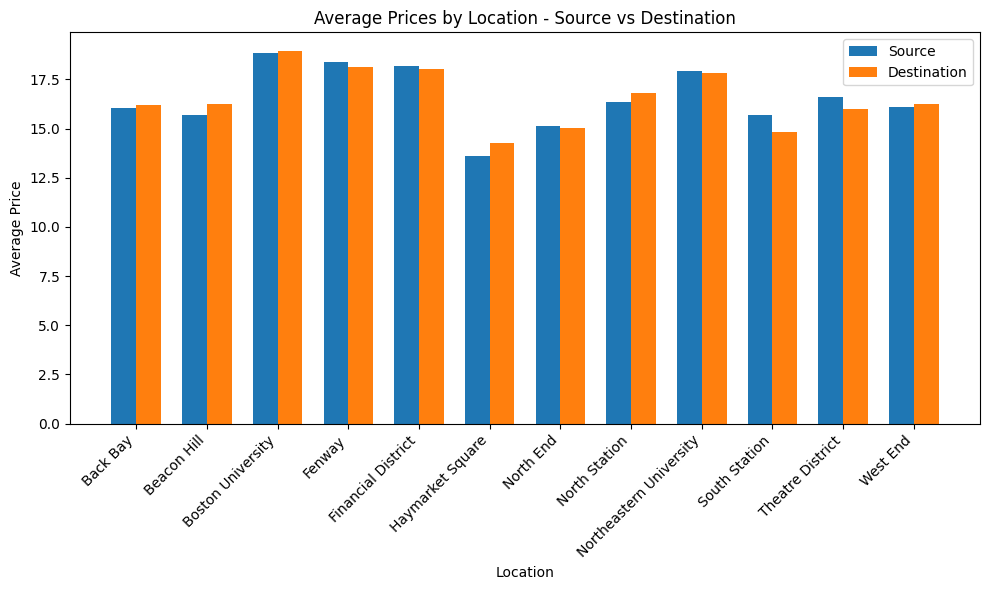

In [18]:
# Group by 'source', then calculate average price
avg_source_prices = df.groupby('source')['price'].mean().reset_index()

# Group by 'destination', then calculate average price
avg_destination_prices = df.groupby('destination')['price'].mean().reset_index()

# Merge the average source and destination prices into a single dataframe
avg_prices = pd.merge(avg_source_prices, avg_destination_prices, left_on='source', right_on='destination', how='outer')
avg_prices['Average Source Price'] = avg_prices['price_x']
avg_prices['Average Destination Price'] = avg_prices['price_y']
avg_prices['Location'] = avg_prices['source'].combine_first(avg_prices['destination'])

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x locations for the groups
ind = range(len(avg_prices))

# The width of the bars
width = 0.35

# Plotting the bars
ax.bar(ind, avg_prices['Average Source Price'], width, label='Source')
ax.bar([i + width for i in ind], avg_prices['Average Destination Price'], width, label='Destination')

# Set labels and title
ax.set_xlabel('Location')
ax.set_ylabel('Average Price')
ax.set_title('Average Prices by Location - Source vs Destination')

# Set x ticks
ax.set_xticks([i + width / 2 for i in ind])
ax.set_xticklabels(avg_prices['Location'], rotation=45, ha='right')

# Adding the legend
ax.legend()

plt.tight_layout()
plt.show()

The bar chart indicates that prices vary among different locations. The highest prices occur from and to Boston University, while the lowest prices occur from and to Haymarket Square. This suggests that there is higher demand in the Boston University area compared to Haymarket Square.

#### **v. Cab Category Percentages**

Finally, the distribution of cab categories will be explored.

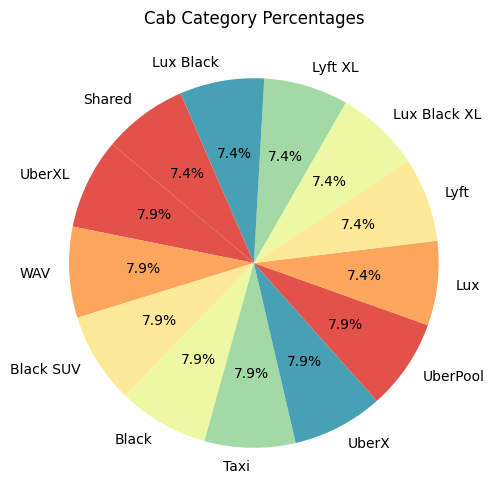

In [19]:
# Count the occurrences of each name
name_counts = df['name'].value_counts()

# Calculate the percentage for each name
name_percentages = (name_counts / name_counts.sum()) * 100

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(name_percentages, labels=name_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Spectral'))
plt.title('Cab Category Percentages')

plt.show()

The distribution of used cab categories is nearly uniform, with each category ranging from 7.4% to 7.9%. This suggests that people are using each cab category almost equally.

### **E. Feature Engineering**

This section will cover creating the model, including splitting the data, handling missing values, dealing with outliers, selecting features, checking cardinality, encoding features, and also scaling.

#### **i. Split Inference Set**

For model testing or inference purposes, 1 row is extracted from the dataset and saved separately as a CSV file.

In [20]:
# Select 1 row to test as inference set and save it to a variable
data_inf = df.sample(1, random_state=1)

# Show price to check later on
data_inf['price']

541064    16.5
Name: price, dtype: float64

In [21]:
# Delete selected row from dataframe
df.drop(data_inf.index, inplace=True)

# Reset index for both dataframe
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Remove target in data_inf
data_inf.drop(['price'], axis=1, inplace=True)

# Save data_inf to csv
data_inf.to_csv('data_inf.csv')

In the dataset used for model creation, the extracted row is removed to ensure that the model does not see that specific data during training.

For the inference dataset, the `price` column, being the target variable, will be excluded or dropped to facilitate model predictions.

#### **ii. Split X (Features) and y (Target)**

During model training, the algorithm learns patterns and relationships between the input features and the target variable. Separating them allows the model to understand how changes in the input features affect the target variable.

In [22]:
# Split between X and y
X = df.drop(['price'], axis=1)
y = df.price

Therefore, the features and target variable will be split into two sets: **X for the features** and **y for the target variable**. In this case, since the target variable is `price`, the separated column will be `price`. The `price` column is removed from X, which contains the features, while y only contains the `price` column.

#### **iii. Split Train-Set and Test-Set**

After separating X and y, both datasets are further split into two sets: **training** and **testing** datasets. This split is essential because it allows us to evaluate the model's performance on unseen data.
- The training dataset is used to train the machine learning model. During training, the model learns the patterns and relationships between the features and the target variable using linear regressions algorithms.
- The testing dataset evaluates how well the trained model generalizes to new data. It helps assess predictive accuracy and key performance metrics like MAE, R2 Score, etc.

Splitting the data into training and testing sets helps prevent overfitting, where the model performs well on the training data but poorly on new data. It also allows us to validate the model's performance and make adjustments if needed to improve its predictive capabilities.

In [23]:
# Splitting train-set and test-set using 'Train_test_split'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Print train and test shape
print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

# Show one of the variable 
X_train.head()

Train Size : (485149, 55)
Test Size : (207921, 55)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
417371,97a49dc2-5f93-4c93-ab50-a1dde1247d14,1.543465e+09,4,29,11,2018-11-29 04:20:08,America/New_York,West End,North End,Uber,...,0.0000,1543420800,33.70,1543399200,42.60,1543438800,29.88,1543399200,36.56,1543435200
688031,351ad48f-6d3e-449d-95b0-6cf410c9e032,1.543782e+09,20,2,12,2018-12-02 20:23:06,America/New_York,Boston University,Theatre District,Uber,...,0.0956,1543770000,36.10,1543726800,50.37,1543784400,35.88,1543748400,49.70,1543784400
241033,a7aa0b68-7d76-460d-bf4d-822946abf87d,1.543314e+09,10,27,11,2018-11-27 10:27:22,America/New_York,Fenway,Back Bay,Lyft,...,0.1425,1543338000,36.34,1543377600,46.91,1543320000,32.43,1543377600,44.01,1543320000
80878,891aa257-f380-46e7-a5af-b4970860176b,1.543763e+09,14,2,12,2018-12-02 14:57:56,America/New_York,Beacon Hill,Haymarket Square,Uber,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
79052,50cf1b2a-c87d-429b-a543-f1fd6bfc2910,1.544692e+09,9,13,12,2018-12-13 09:05:11,America/New_York,Beacon Hill,North End,Lyft,...,0.0001,1544716800,18.19,1544688000,34.02,1544731200,13.67,1544688000,33.04,1544734800


The training and testing sets are divided into 70% for training and 30% for testing, using a random state of 1. As a result, the training set contains 485,149 rows, while the testing set contains 207,921 rows.

#### **iv. Missing Value Handling**

After splitting the data into training and testing sets, the previously identified missing values need to be handled. It's worth noting that the `price` column still contains missing values that require attention.

The missing values in `price` column is assumed to be **MAR (Missing at Random)**. The assumption that the missing values in the `price` column are Missing at Random (MAR) is supported by several factors. Firstly, the missingness is related to the observed data (the `price` column), but not to the unobserved data. Additionally, there are noticeable patterns in the missingness, hinting at a correlation with the data itself rather than external factors. For example, missing prices might occur more frequently for specific types of trips or during particular time periods, indicating a link with the data characteristics. This supports the MAR assumption, where the likelihood of missingness is influenced by observed data rather than unobserved factors.

[Reference](https://www.sciencedirect.com/science/article/pii/S0895435622002189#:~:text=The%20three%20missing%20data%20mechanisms,distributed%20over%20the%20data%20sample)

**Training Set**

In [24]:
# Combine X_train and y_train for easier handling
train_data = pd.concat([X_train, y_train], axis=1)

# Remove rows with missing values in the 'price' column from the training data
train_data.dropna(subset=['price'], inplace=True)

# Update X_train and y_train after removing missing values
X_train = train_data.drop(columns='price')
y_train = train_data['price']

**Testing Set**

In [25]:
# Combine X_test and y_test for easier handling
test_data = pd.concat([X_test, y_test], axis=1)

# Remove rows with missing values in the 'price' column from the testing data
test_data.dropna(subset=['price'], inplace=True)

# Update X_test and y_test after removing missing values
X_test = test_data.drop(columns='price')
y_test = test_data['price']

From both the training and testing sets, the `price` column with missing values is dropped and the datasets are updated to the four variables: `X_train`, `y_train`, `X_test`, and `y_test`.

In [26]:
# Check missing value in X_train
X_train.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

There are no missing values in `X_train`, and they have been successfully removed.

In [27]:
# Check missing value in X_test
X_test.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

There are no missing values in `X_test`, and they have been successfully removed.

In [28]:
# Check missing value in y_train
y_train.isnull().sum()

0

There are no missing values in `y_train`, and they have been successfully removed.

In [29]:
# Check missing value in y_test
y_test.isnull().sum()

0

There are no missing values in `y_test`, and they have been successfully removed.

#### **v. Outlier Handling**

Not only do missing values need to be addressed, but outliers also require handling. Outliers are values that differ significantly from the rest of the data points in a dataset. They can skew statistical analyses and machine learning models, leading to inaccurate predictions or conclusions. Handling outliers involves identifying them through statistical methods such as z-scores or interquartile range (IQR), and then either removing them from the dataset or applying transformations to mitigate their impact on the analysis.

In [30]:
# Create function to check skewness
def check_skewness(df, *column_names):
    return {col: df[col].skew() for col in column_names if col in df.columns}

# Create function to drop outliers from normal distributed columns 
def drop_outliers_normal(df, *column_names):
    for col in column_names:
        avg = df[col].mean()
        std = df[col].std()
        upper_limit = avg + 3 * std
        lower_limit = avg - 3 * std
        df.drop(df[(df[col] > upper_limit) | (df[col] < lower_limit)].index, inplace=True)

# Create function to drop outliers from skewed distributed columns 
def drop_outliers_skewed(df, *column_names):
    for col in column_names:
        iqr = 1.5 * (np.percentile(df[col], 75) - np.percentile(df[col], 25))
        upper_limit = np.percentile(df[col], 75) + iqr
        lower_limit = np.percentile(df[col], 25) - iqr
        df.drop(df[(df[col] > upper_limit) | (df[col] < lower_limit)].index, inplace=True)

# Create function to drop outliers from extreme skewed distributed columns 
def drop_outliers_skewed_extreme(df, *column_names):
    for col in column_names:
        iqr = 3 * (np.percentile(df[col], 75) - np.percentile(df[col], 25))
        upper_limit = np.percentile(df[col], 75) + iqr
        lower_limit = np.percentile(df[col], 25) - iqr
        df.drop(df[(df[col] > upper_limit) | (df[col] < lower_limit)].index, inplace=True)

In [31]:
X_train['surge_multiplier'].unique()

array([1.  , 1.25, 1.75, 1.5 , 2.  , 3.  , 2.5 ])

The existing code implements four functions to streamline the detection and removal of outliers, especially for datasets with numerous columns (in this case, 56 columns). However, columns with a small number of unique values are not currently addressed by these functions due to their limited variability.

For instance, the `surge_multiplier` column, which contains only seven unique values, is not handled by the functions. Removing outliers from such columns can significantly impact the results.

The columns that are currently excluded from the outlier handling process are:
- `hour`
- `day`
- `month`
- `surge_multiplier`
- `cab_type`
- `name`
- `short_summary`
- `icon`
- `uvIndex`

These columns are excluded to avoid unintended effects on the data due to their limited variability or categorical nature.

In [32]:
# Calculate skewness of all numeric columns
skewness_results = check_skewness(X_train, 'distance', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity',
                                  'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
                                  'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime',
                                  'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'ozone',
                                  'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime',
                                  'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax',
                                  'apparentTemperatureMaxTime')

# Print skewness
for col, skewness in skewness_results.items():
    print(f"{col}: {skewness}")

distance: 0.815549425153006
latitude: -2.114257011969783
longitude: -0.3538718129603103
temperature: -0.6098778066323062
apparentTemperature: -0.3966020555704245
precipIntensity: 3.332057768625899
precipProbability: 2.031032952394707
humidity: -0.07285500797179816
windSpeed: 0.452240983233187
windGust: 1.118859871930692
windGustTime: 0.43871211843390717
visibility: -1.509097608234835
temperatureHigh: 0.07579163941501306
temperatureHighTime: 0.429664260608672
temperatureLow: -0.3339719190174421
temperatureLowTime: 0.4413443864139735
apparentTemperatureHigh: 0.06774312509719536
apparentTemperatureHighTime: 0.42652997456704683
apparentTemperatureLow: -0.49937735679267337
apparentTemperatureLowTime: 0.4371876740127228
dewPoint: -0.4978124350626098
pressure: 0.15392738422959662
windBearing: -0.6284822299343273
cloudCover: -0.730763461604399
ozone: 0.4149584084995321
sunriseTime: 0.43414247529911837
sunsetTime: 0.43427395483591
moonPhase: -0.37947774565773057
precipIntensityMax: 0.9945910119

The values indicate the skewness of each column. A looping simplifies the categorization of skewness.

In [33]:
# Initialize empty lists for each skewness category
normal_columns = []
skewed_columns = []
extreme_skewed_columns = []

# Loop through the skewness values and categorize the columns
for col, skewness in skewness_results.items():
    if skewness < -1.0 or skewness > 1.0:
        extreme_skewed_columns.append(col)
    elif abs(skewness) <= 0.5:
        normal_columns.append(col)
    else:
        skewed_columns.append(col)

# Print the columns in each category
print(f"Normal: {normal_columns}\nSkewed: {skewed_columns}\nExtreme Skewed: {extreme_skewed_columns}")


Normal: ['longitude', 'apparentTemperature', 'humidity', 'windSpeed', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'uvIndexTime', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime']
Skewed: ['distance', 'temperature', 'windBearing', 'cloudCover', 'precipIntensityMax', 'temperatureMin', 'apparentTemperatureMax']
Extreme Skewed: ['latitude', 'precipIntensity', 'precipProbability', 'windGust', 'visibility', 'apparentTemperatureMin']


Once the columns have been categorized based on their distribution type, the next step involves dropping outliers using the previously created function.

In [34]:
# Removing outliers with normal distribution in X_train
for col in normal_columns:
    drop_outliers_normal(X_train, col)

# Removing outliers with skewed distribution in X_train
for col in skewed_columns:
    drop_outliers_skewed(X_train, col)

# Removing outliers with extreme skewed distribution in X_train
for col in extreme_skewed_columns:
    drop_outliers_skewed_extreme(X_train, col)

To maintain balanced rows based on their index, both `X_train` and `y_train` should be dropped in the code, not just `X_train`. Therefore, the `y_train` data is also dropped based on `X_train`'s index.

In [35]:
# Removing outliers in y_train with the same index
y_train = y_train.loc[X_train.index]

After removing outliers from both the training set, it's essential to check the shape of the variables to ensure they have the same number of rows.

In [36]:
# Print shape
print(X_train.shape)
print(y_train.shape)

(219841, 55)
(219841,)


Both variables having the same number of rows indicates that the dropped outliers from X and y are the same, resulting in a reduced number of rows.

#### **vi. Feature Selection**

This section focuses on selecting the features that have a correlation with the `price` column. Feature selection is performed to identify the most relevant variables that impact the pricing.

Before feature selection, certain columns such as `id` and `timestamp`, serve as unique identifiers and can be dropped. Similarly, the `timezone` column with only one unique value has no impact on the pricing and can also be dropped. Column `product_id` is redundant as its value is the same as `name`, so it can be removed as well.

In [37]:
# Drop unnecessary columns from X_train and X_test
X_train.drop(columns=['id', 'timestamp', 'product_id', 'timezone'], axis=1, inplace=True)
X_test.drop(columns=['id', 'timestamp', 'product_id', 'timezone'], axis=1, inplace=True)

# Print result
print(X_train.columns)

Index(['hour', 'day', 'month', 'datetime', 'source', 'destination', 'cab_type',
       'name', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')


The result confirms that the unnecessary columns have been successfully dropped from both `X_train` and `X_test` datasets.

Next, the `X_train` and `y_train` need to be concatenated to combine the features and target variable into a single dataframe.

In [38]:
# Concatenate X_train and y_train
concat_train = pd.concat([X_train, y_train], axis=1)

# show X_train
concat_train.head()

,hour,day,month,datetime,source,destination,cab_type,name,distance,surge_multiplier,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price
417371,4,29,11,2018-11-29 04:20:08,West End,North End,Uber,WAV,1.03,1.0,...,1543420800,33.70,1543399200,42.60,1543438800,29.88,1543399200,36.56,1543435200,8.5
56263,18,15,12,2018-12-15 18:50:08,Back Bay,Fenway,Lyft,Lux,1.44,1.0,...,1544893200,39.80,1544929200,54.29,1544896800,36.78,1544929200,53.62,1544896800,13.5
392132,19,28,11,2018-11-28 19:06:26,Back Bay,Haymarket Square,Lyft,Lux,2.25,1.0,...,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.75,1543438800,19.5
37294,6,30,11,2018-11-30 06:57:55,North Station,Fenway,Lyft,Lux Black,3.20,1.0,...,1543593600,28.64,1543575600,42.57,1543600800,27.20,1543568400,40.51,1543611600,27.5
385243,19,27,11,2018-11-27 19:15:22,Boston University,Financial District,Uber,WAV,4.72,1.0,...,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000,14.0


The code displays the `concat_train` dataframe.

To perform a correlation check of price and features, the method used is **Phik Matrix**. In this analysis, Phik Matrix is employed to capture the correlation between variables, which is essential for understanding relationships between price and features.

The Phik matrix is a measure of correlation used for **both categorical and numerical variables**. It can find correlations between different types of variables, making it useful for analyzing datasets with mixed data types. However, it's especially known for its effectiveness in handling categorical data, where traditional correlation measures may not provide meaningful insights.

In [39]:
# Create function to correlaete variables with price
def compute_phik_correlation(dataframe, columns):
    subset = dataframe[columns]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix['price']

# Define the list of columns for each subset
columns_set1 = ['price', 'surge_multiplier', 'hour', 'day', 'month', 'datetime', 'source', 'destination', 'cab_type', 'name', 'distance', 'latitude', 'longitude']
columns_set2 = ['price', 'temperature', 'apparentTemperature', 'short_summary', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime']
columns_set3 = ['price', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone']
columns_set4 = ['price', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']

# Compute Phi-K correlation for each set of columns and print
price_correlation_set1 = compute_phik_correlation(concat_train, columns_set1)
price_correlation_set2 = compute_phik_correlation(concat_train, columns_set2)
price_correlation_set3 = compute_phik_correlation(concat_train, columns_set3)
price_correlation_set4 = compute_phik_correlation(concat_train, columns_set4)

# Print result
print(price_correlation_set1)
print(price_correlation_set2)
print(price_correlation_set3)
print(price_correlation_set4)

interval columns not set, guessing: ['price', 'surge_multiplier', 'hour', 'day', 'month', 'distance', 'latitude', 'longitude']


c:\Users\septi\anaconda3\envs\hacktive\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable datetime is large: 15655. Are you sure this is not an interval variable? Analysis for pairs of variables including datetime can be slow.
  warnings.warn(


interval columns not set, guessing: ['price', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime']


c:\Users\septi\anaconda3\envs\hacktive\lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable precipIntensity for analysis 1. Dropping this column
  warnings.warn(
c:\Users\septi\anaconda3\envs\hacktive\lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable precipProbability for analysis 1. Dropping this column
  warnings.warn(


interval columns not set, guessing: ['price', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone']
interval columns not set, guessing: ['price', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']
price               1.000000
surge_multiplier    0.372002
hour                0.000000
day                 0.000000
month               0.002786
datetime            0.120576
source              0.156608
destination         0.154577
cab_type            0.162972
name                0.682981
distance            0.424525
latitude            0.000000
longitude           0.000000
Name: price, dtype: float64
price

The columns are divided into 4 groups to ensure faster processing and reduce loading time. All columns will be predicted against the target variable, `price`. The Phik coefficient ranges from 0 to 1, where 0 indicates no correaltion and 1 indicates a perfect correlation with price.

For this analysis, a threshold of 0.3 is chosen. Features with a Phik coefficient greater than 0.3 are considered to have a significant correlation with `price`. This threshold is based on the fact that `distance` has a Phik coefficient of 0.4 and is known to strongly influence price logically.

The features that show correlation with price above the threshold of 0.3 are:
- name
- distance
- surge_multiplier

However, there is evidence suggesting that `hour` can impact price as well. For instance, prices often rise during peak hours due to surge multipliers. The `cab_type` can also influence the pricing as different types of cabs typically have varying price points. Therefore, the `hour` and `cab_type` column will also be included in this analysis. 

[Reference 1](https://www.researchgate.net/publication/359997934_The_effects_of_peak_hour_and_congested_area_taxi_surcharges_on_customers%27_travel_decisions_Empirical_evidence_and_policy_implications)  
[Reference 2](https://allmarintaxis.com/how-taxi-fare-is-calculated/)

In [40]:
# Drop unnecessary columns in X_train
X_train.drop(['day', 'month', 'datetime', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'long_summary', 'short_summary',
              'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
              'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime',
              'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
              'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime',
              'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax',
              'apparentTemperatureMaxTime', 'source', 'destination'], axis=1,  inplace=True)

# Drop unnecessary columns in X_test
X_test.drop(['day', 'month', 'datetime', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'long_summary', 'short_summary',
             'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
             'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime',
             'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
             'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime',
             'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax',
             'apparentTemperatureMaxTime', 'source', 'destination'], axis=1,  inplace=True)

The code above provided drops the unnecessary columns that do not have a correlation with the `price` column.

In [41]:
# Show columns
print(X_train.columns)
print(X_test.columns)

Index(['hour', 'cab_type', 'name', 'distance', 'surge_multiplier'], dtype='object')
Index(['hour', 'cab_type', 'name', 'distance', 'surge_multiplier'], dtype='object')


`X_train` and `X_test` have been refined to exclusively contain the columns that have correlation with `price`.

#### **vi. Split Numerical and Categorical Columns**

Once the necessary columns are identified, they will be categorized based on their data types. A table is already available at the beginning, which categorizes these columns according to their data types.

In [42]:
# Split numerical and categorical columns

num_std = ['hour']
num_minmax = ['distance', 'surge_multiplier']
cat_nominal = ['cab_type', 'name']

print(f'Numerical normal distribution columns:\n{num_std}')
print('')
print(f'Numerical skewed distribution columns:\n{num_minmax}')
print('')
print(f'Nominal categorical columns:\n{cat_nominal}')

Numerical normal distribution columns:
['hour']

Numerical skewed distribution columns:
['distance', 'surge_multiplier']

Nominal categorical columns:
['cab_type', 'name']


The normally distributed columns are saved in the variable `num_std` as they will be processed using Standard Scaler, while the skewed distributed columns are saved in the variable `num_minmax` as they will be processed using MinMax Scaler. The nominal categorical columns are saved in the variable `cat_nominal` as they will be processed using One Hot Encoder.

After that, they are split again based on column types in the `X_train` and `X_test` datasets to segregate numerical and categorical features for further processing.

In [43]:
# Split train-test based on column types

X_train_num_std = X_train[num_std]
X_test_num_std = X_test[num_std]

X_train_num_minmax = X_train[num_minmax]
X_test_num_minmax = X_test[num_minmax]

X_train_cat_nominal = X_train[cat_nominal]
X_test_cat_nominal = X_test[cat_nominal]

X_train_cat_nominal.head()

,cab_type,name
417371,Uber,WAV
56263,Lyft,Lux
392132,Lyft,Lux
37294,Lyft,Lux Black
385243,Uber,WAV


 The code above achieves this by assigning specific subsets of columns to respective variables:

- `X_train_num_std` and `X_test_num_std` contain numerical columns with standard scaling applied.
- `X_train_num_minmax` and `X_test_num_minmax` contain numerical columns with min-max scaling applied.
- `X_train_cat_nominal` and `X_test_cat_nominal` contain nominal categorical columns.

#### **vii. Cardinality Check**

In Machine Learning, there's a distinction in treating columns based on the number of unique values they contain. Columns with a high number of unique values (high cardinality) are prioritized over those with fewer unique values (low cardinality), which introduces a bias. To address this, a cardinality check is performed to evaluate whether categorical columns exhibit a high number of unique values.

In [44]:
# Check number of unique values in categorical columns

print('Number of categories in the variable Cab Type          : {}'.format((X_train_cat_nominal.cab_type.nunique())))
print('Number of categories in the variable name              : {}'.format((X_train_cat_nominal.name.nunique())))

Number of categories in the variable Cab Type          : 2
Number of categories in the variable name              : 12


The `name` feature contains 12 unique values, which exceeds the typical threshold of 10 for categorical features. Although grouping these ride types into broader categories can simplify the model's input, it risks losing important distinctions that significantly impact pricing. For example, the price variation between 'UberX' and 'Lyft XL' could be substantial, yet if both are categorized as 'Standard Rides', these details are overlooked. Reducing the level of detail can make the model's predictions less accurate. Therefore, it may be better **not to simplify the name category**, allowing the model to take full advantage of the specific differences between each type.

#### **viii. Feature Encoding**

After checking the cardinality, the categorical column can proceed to the next step, which is Encoding. Linear Regression cannot interpret words; however, categorical columns contain words instead of numbers. To facilitate this, these categorical columns need to be converted into numerical representations. This process is called Encoding.

In [45]:
# Check nominal variable
X_train_cat_nominal.head()

,cab_type,name
417371,Uber,WAV
56263,Lyft,Lux
392132,Lyft,Lux
37294,Lyft,Lux Black
385243,Uber,WAV


In [46]:
# Check cab_type unique values
X_train_cat_nominal['cab_type'].unique()

array(['Uber', 'Lyft'], dtype=object)

In [47]:
# Check name unique values
X_train_cat_nominal['name'].unique()

array(['WAV', 'Lux', 'Lux Black', 'Shared', 'UberXL', 'Lux Black XL',
       'UberPool', 'Black', 'Black SUV', 'UberX', 'Lyft XL', 'Lyft'],
      dtype=object)

This is how the `cab_type` and `name` column consist of before encoding. It still contains textual data (words) within its entries.

For encoding, there are two methods available:
- **OrdinalEncoder** : Used for ordinal columns where the order matters. Ordinal Encoding assigns integer values to categories based on their order.
- **OneHotEncoder** : Used for nominal columns without levels, where the features have no intrinsic ordering.

Since the `cab_type` and `name` column are both nominal, it will be processed using OneHotEncoding.

In [48]:
# Define encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Transform the nominal column
X_train_cat_nominal_encoded = ohe.fit_transform(X_train_cat_nominal)
X_test_cat_nominal_encoded = ohe.transform(X_test_cat_nominal)

# Show result
X_train_cat_nominal_encoded

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

The `cab_type` and `name` column has been successfully encoded and saved to a new value for both training and testing datasets.

#### **ix. Feature Scaling**

The previous steps focused on transforming the categorical columns. Now, the next step involves handling the numerical columns. There are 3 numerical columns, each with a wide range of values. This wide range indicates that the columns have different scales, making direct comparisons challenging. Therefore, they need to be standardized using a method called Feature Scaling.

For scaling, there are three methods available:

- **Standard Scaling** : Used for columns with a normal distribution. StandardScaler scales the data to have a mean of 0 and a standard deviation of 1.
- **Min-Max Scaling** : Used for columns with skewed distributions. MinMaxScaler scales the data to a fixed range, typically between 0 and 1.
- **Robust Scaling** : Used for columns with too many outliers.

Here's how the scaling methods will be applied to the columns:

- `hour` (normal distribution) => StandardScaler
- `distance` (skewed distribution) => MinMaxScaler
- `surge_multiplier` (extreme skewed distribution) => MinMaxScaler

**Standard Scaling**

In [49]:
# Define scaler
standard_scaler = StandardScaler()

# Transform the 'hour' column
X_train_num_std_scaled = standard_scaler.fit_transform(X_train_num_std)
X_test_num_std_scaled = standard_scaler.transform(X_test_num_std)

# Show result
X_train_num_std_scaled

array([[-1.10769503],
       [ 0.83867972],
       [ 0.97770648],
       ...,
       [ 0.97770648],
       [-1.38574857],
       [ 0.97770648]])

**Min Max Scaling**

In [50]:
# Define scaler
minmax_scaler = MinMaxScaler()

# Transform the 'distance' and 'surge_multiplier' column
X_train_num_minmax_scaled = minmax_scaler.fit_transform(X_train_num_minmax)
X_test_num_minmax_scaled = minmax_scaler.transform(X_test_num_minmax)

# Show result
X_train_num_minmax_scaled

array([[0.18703704, 0.        ],
       [0.26296296, 0.        ],
       [0.41296296, 0.        ],
       ...,
       [0.1       , 0.        ],
       [0.47777778, 0.        ],
       [0.26296296, 0.        ]])

Both outcomes indicate successful scaling operations for both training and testing datasets.

#### **x. Concatenate Numerical and Categorical Columns**

After separating numerical and categorical columns due to their distinct processing requirements, these columns need to be concatenated again to unify the dataset. This step ensures that the data is combined appropriately for further analysis or modeling.

In [51]:
# Concat columns
X_train_final = np.concatenate([X_train_num_std_scaled, X_train_num_minmax_scaled, X_train_cat_nominal_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_std_scaled, X_test_num_minmax_scaled, X_test_cat_nominal_encoded],axis=1)

# Show result
X_train_final

array([[-1.10769503,  0.18703704,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.83867972,  0.26296296,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.97770648,  0.41296296,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.97770648,  0.1       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.38574857,  0.47777778,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.97770648,  0.26296296,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

Both `X_train_final` and `X_test_final` now contain the merged columns.

### **F. Model Definition**

After completing Feature Engineering, the next process is defining the model. The chosen model is **Linear Regression**, and the evaluation metrics include **MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), MSE (Mean Squared Error), and R-squared score (r2 score)**.

- **Linear Regression** is used because it's a simple yet effective model for predicting numerical values based on linear relationships within the data. It's particularly suitable when the relationship between features and target variables is approximately linear. This decision is based on noticing a direct correlation in the data between the features and the target variable, which makes Linear Regression an appropriate selection.

- **MAE** is used because it provides a measure of the average of errors in predictions, giving equal weight to all errors regardless of their direction. This metric is valuable for understanding the typical error in the model's predictions and is straightforward to interpret.

- **MSE** is used because it punishes larger errors more than MAE, making it more sensitive to outliers. This metric is beneficial when emphasizing the impact of larger errors on the overall model performance.

- **RMSE**  is used because it gives a measure of the average magnitude of error in predictions, with larger errors having a greater impact due to the square term. This metric is valuable for understanding the spread of errors in the model's predictions. Its easier to understand rather than MSE.

- **R2 score** is used because it provides an indication of how well the model fits the data by comparing the variance explained by the model to the total variance in the data. A higher r2 score indicates a better fit of the model to the data, making it a crucial metric for evaluating model performance and goodness of fit.

In [52]:
# Define model
model = LinearRegression()

### **G. Model Training**

Following the model definition, the model is trained using the `X_train_final` and `y_train` variables.

In [53]:
# Train the model linear
model.fit(X_train_final, y_train)

LinearRegression()

### **H. Model Evaluation**

#### **i. Linear Regression**

Once the model has been trained, the next step involves comparing the predictions generated using the training data (`X_train_final`) with those from the testing data (`X_test_final`). This comparison helps evaluate how well the model generalizes to unseen data.

In [54]:
# Predict Train-set dan Test-set
y_pred_train = model.predict(X_train_final)
y_pred_test = model.predict(X_test_final)

In [55]:
# Show comparison
comparison = {'Actual Price': y_test,
              'Predicted Price': y_pred_test}

pd.DataFrame(comparison)

,Actual Price,Predicted Price
541064,10.5,6.928711
215250,13.5,15.257812
454530,7.0,5.699219
150598,10.0,12.708008
569129,20.5,22.134766
...,...,...
678265,11.0,11.453125
438674,8.0,5.927734
253846,13.5,13.305664
675309,34.0,33.457031


These comparisons often reveal variances, with some predictions being close to the actual values while others differs significantly.

To provide a clearer evaluation, loss or cost functions measure this difference, offering a numerical measure of model accuracy. Evaluating metrics for both training and testing datasets provides insights into the model's generalization and prediction capabilities.

In [56]:
# Ignore the specific FutureWarning raised by the 'squared' parameter in mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)

# Calculate metrics
metrics = {
    "MAE": {
        "Train Set": round(mean_absolute_error(y_train, y_pred_train),2),
        "Test Set": round(mean_absolute_error(y_test, y_pred_test),2)
    },
    "MSE": {
        "Train Set": round(mean_squared_error(y_train, y_pred_train),2),
        "Test Set": round(mean_squared_error(y_test, y_pred_test),2)
    },
    "RMSE": {
        "Train Set": round(mean_squared_error(y_train, y_pred_train, squared=False),2),
        "Test Set": round(mean_squared_error(y_test, y_pred_test, squared=False),2)
    },
    "R2 Score": {
        "Train Set": round(r2_score(y_train, y_pred_train),2),
        "Test Set": round(r2_score(y_test, y_pred_test),2)
    }
}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Print the table
metrics_df

,MAE,MSE,RMSE,R2 Score
Train Set,1.75,6.05,2.46,0.93
Test Set,1.78,6.34,2.52,0.93


**MAE (Mean Absolute Error)**:
- Train Set: On average, the model's predictions are off by approximately $1.75 from the actual prices in the training data.    
- Test Set: Similarly, in the testing data, the model's predictions have an average error of around $1.78.

**MSE (Mean Squared Error) and RMSE (Root Mean Squared Error)**:
- Train Set: The MSE is approximately 6.05, resulting in an RMSE of about $2.46. This suggests that some of the model's predictions are off by a relatively large margin when squared.
- Test Set: The MSE for the testing set is 6.34, resulting in an RMSE of about $2.52, indicating similarly significant errors squared in the test data as well.

**R2 Score (Coefficient of Determination)**:
- Train Set:  An R2 Score of 0.93 means the model can explain 93% of the variance in the training data's prices. This high score indicates a strong fit between the model's predictions and the actual prices.
- Test Set: The same R2 Score of 0.93 for the test set indicates that the model effectively captures and explains 93% of the variance in the test data's prices, mirroring its performance in the training set. This consistency underscores the model’s ability to generalize well from training to real-world scenarios.

Overall, the model demonstrates a **good fit**, as evidenced by its consistent R2 score of 0.93 across both training and testing sets, indicating robustness and reliable performance in fare price prediction. The MAE and RMSE values confirm its accuracy and stability, making it a dependable tool for estimating cab fares.

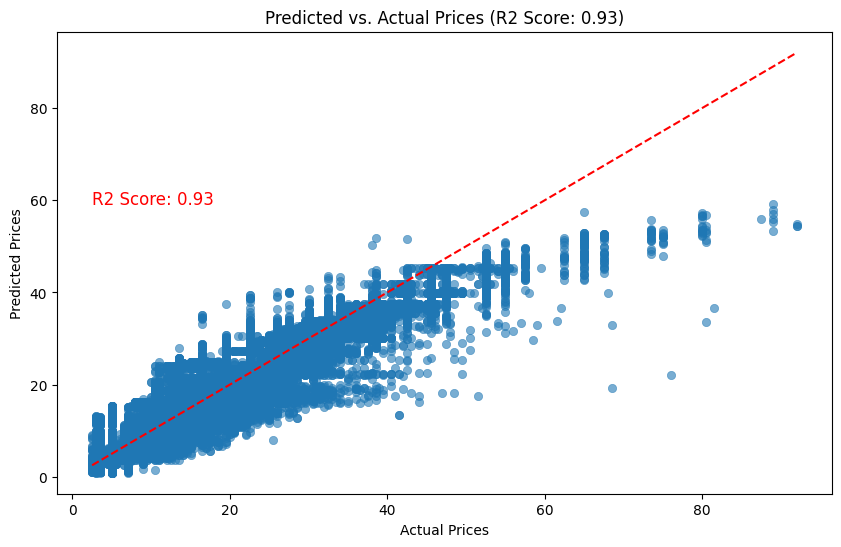

In [57]:
# Calculate R2 score for annotation
r2 = round(r2_score(y_test, y_pred_test), 2)

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6, edgecolor=None)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

# Add titles and labels
plt.title(f'Predicted vs. Actual Prices (R2 Score: {r2})')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Add R2 score text within the plot for clarity
plt.text(x=min(y_test), y=max(y_pred_test), s=f'R2 Score: {r2}', fontsize=12, color='red')

# Show the plot
plt.show()


Looking at the scatter plot:

- Most predictions cluster close to the actual prices, indicating a generally accurate model.
- There's a noticeable deviation at higher price ranges, where the model tends to predict lower than the actual cost.
- The R2 score, at 0.93, is quite high, suggesting the model does a good job explaining the variations in price.
- The spread of points becomes wider as the price increases, hinting that the model may have limitations or missing factors that affect pricing at these higher levels.

#### **ii. Comparison with other Regression**

To understand how different models perform and how their parameters impact predictions, let's compare linear regression, ridge regression, and lasso regression. Evaluating their respective scores and metrics like MAE, RMSE, MSE, and R2 provides insights into the differences in predictive accuracy and model performance.

In [58]:
# Create function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    return mae_train, mae_test, rmse_train, rmse_test, mse_train, mse_test, r2_train, r2_test

# Create function to find the best model and parameters
def grid_search(X_train, y_train, X_test, y_test):
    model = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'Ridge Regression': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1.0, 10.0],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
            }
        },
        'Lasso Regression': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        }
    }

    results = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)
    for algorithm, config in model.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_train, y_train)

        mae_train, mae_test, rmse_train, rmse_test, mse_train, mse_test, r2_train, r2_test = evaluate_model(gs.best_estimator_, X_train, y_train, X_test, y_test)
        
        results.append({
            'model': algorithm,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'MAE_train': mae_train,
            'MAE_test': mae_test,
            'RMSE_train': rmse_train,
            'RMSE_test': rmse_test,
            'MSE_train': mse_train,
            'MSE_test': mse_test,
            'R2_train': r2_train,
            'R2_test': r2_test
        })

    return pd.DataFrame(results, columns=['model', 'best_score', 'best_params', 'MAE_train', 'MAE_test', 'RMSE_train', 'RMSE_test', 'MSE_train', 'MSE_test', 'R2_train', 'R2_test'])

# Find the best model and parameters
grid_search(X_train_final, y_train, X_test_final, y_test)

,model,best_score,best_params,MAE_train,MAE_test,RMSE_train,RMSE_test,MSE_train,MSE_test,R2_train,R2_test
0,Linear Regression,0.929269,{},1.747894,1.783612,2.460159,2.518557,6.052383,6.343130,0.929335,0.927013
1,Ridge Regression,0.929274,"{'alpha': 0.1, 'solver': 'saga'}",1.747845,1.783534,2.460154,2.518499,6.052355,6.342838,0.929335,0.927017
2,Lasso Regression,0.170794,"{'alpha': 1, 'selection': 'cyclic'}",6.906535,6.934766,8.428190,8.507602,71.034392,72.379290,0.170628,0.167172


Linear and ridge regression models perform similarly well with low errors and high R2 scores, indicating good predictive accuracy and generalization. However, lasso regression, despite its lower best score, shows higher errors and lower R2 scores, suggesting it might not capture the data complexity as effectively.

The model used will be **Linear Regression** because it demonstrates better performance to ridge regression in terms of low errors and high R2 scores, indicating strong predictive accuracy and generalization. 

### **I. Model Saving**

The next step is to save the model using the `pickle` library. This library can save the trained model, scalers, encoders, and other necessary components, allowing them to be loaded later during model inference.

In [59]:
# Save trained model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save StandardScaler
with open('standard_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(standard_scaler, scaler_file)

# Save MinMaxScaler
with open('minmax_scaler.pkl', 'wb') as minmax_file:
    pickle.dump(minmax_scaler, minmax_file)

# Save nominal encoder
with open('ohe.pkl', 'wb') as ohe_file:
    pickle.dump(ohe, ohe_file)

# Save numerical standardization info
with open('num_std.json', 'w') as num_std_file:
    json.dump(num_std, num_std_file)
    
# Save numerical min-max scaling info
with open('num_minmax.json', 'w') as num_minmax_file:
    json.dump(num_minmax, num_minmax_file)

# Save categorical nominal encoding info
with open('cat_nominal.json', 'w') as cat_nominal_file:
    json.dump(cat_nominal, cat_nominal_file)

### **J. Model Inference**

This section will be performed in a separate file named **'P1G4_livia_amanda_inference.ipynb'**.

### **K. Conceptual Problems**

#### **i. Linear Regression**

Linear Regression assumptions:

1. **Linear Relationship**: This assumption states that there must be a linear relationship between the features (independent variables) and the target (dependent variable). This means that changes in the predictors will lead to proportional changes in the target variable.

2. **No Multicollinearity**: This assumption requires that there should be little or no exact linear relationship among the independent variables. High multicollinearity can make it difficult to ascertain the effect of each independent variable on the dependent variable because they tend to change together.

3. **Normal Distribution of Errors**: This assumption involves the residuals (not just the univariate distribution of each independent variable, but the entire set) being normally distributed.

4. **Independence of Errors**: This assumption states that the residuals from the model are not correlated with each other. In other words, the current value of the residual should not be influenced by the previous value(s) of the residual. Autocorrelation often occurs in time series data where the next value may be influenced by the previous values, violating this assumption and potentially leading to inefficient estimates.

5. **Homoscedasticity**: This assumption implies that the variance of the residuals should be constant across all levels of the independent variables. If the variance of the residuals varies, it’s known as heteroscedasticity, which can lead to biases in the estimate of the coefficients.

#### **ii. Coefficient and Intercept**

In [60]:
# Convert X_train_final to dataframe
X_train_final_pd = pd.DataFrame(X_train_final)

In [61]:
# Extract feature names
column = ohe.get_feature_names_out().tolist()
features = num_std + num_minmax + column

In [62]:
# Check coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

params = {
    'Feature': features,
    'Coefficient': model.coef_.tolist()
}

print('Intercept : ', intercept)
pd.DataFrame(params)

Intercept :  -7340651650176.155


,Feature,Coefficient
0,hour,4.075347e-03
1,distance,1.546645e+01
2,surge_multiplier,3.662611e+01
3,cab_type_Lyft,7.120219e+12
4,cab_type_Uber,7.383305e+12
5,name_Black,-4.265342e+10
6,name_Black SUV,-4.265342e+10
7,name_Lux,2.204324e+11
8,name_Lux Black,2.204324e+11
9,name_Lux Black XL,2.204324e+11


**1. Intercept**
- Value: -7,340,651,650,176.155
- Interpretation: This value represents the baseline price when all other features are zero. However, the extremely large negative value suggests that there might be issues with the data scaling, feature encoding, or the model itself.

**2. Numerical Features**
- **Hour** (0.004): Minimal increase in price with each hour, indicating a minor impact on pricing.
- **Distance** (15.4664): Each additional unit of distance increases the price by approximately $15.46, highlighting its significant influence on ride costs.
- **Surge Multiplier** (36.6261): Each point increase during peak times adds about $36.62 to the fare, showing a strong effect on pricing during high demand.

**3. Categorical Features**
- **Cab Type** (Lyft vs. Uber): According to the model's coefficients, Uber rides are priced higher than Lyft rides. Specifically, the model's output shows a coefficient of 7.120219e+12 for Lyft, whereas Uber has a much larger coefficient of 7.383305e+12. This large difference suggests that choosing Uber over Lyft could significantly increase the cost of a ride, indicating a distinct pricing strategy between these two ride-sharing companies.

- **Ride Categories**:
    - More Expensive: Lux rides such as 'Lux', 'Lux Black', and similar types are priced higher, reflecting their premium nature.
    - Less Expensive: Rides like 'Black', 'UberPool', and others are comparatively cheaper, aligning with their basic or shared service features.

### **L. Analysis**

#### **i. EDA**

- **User Preferences:** The analysis reveals a clear preference among users for Uber over Lyft, indicating a higher adoption rate or perceived preference for Uber's services.

- **Usage Patterns:** Most people choose to use cabs between 11 PM and 12 AM, showing that this time is when more people want cabs.

- **Pricing Correlation:** The EDA uncovers a significant correlation between price and factors like distance and surge multiplier, underlining the impact of these variables on fare calculation.

- **Location-Based Price Variations:** There are noticeable differences in prices depending on the location of the trip. Fares for rides associated with Boston University are higher, while those connected to Haymarket Square are lower.

- **Cab Category:** The distribution of cab categories reveals a consistent pattern, with each category accounting for a similar percentage of rides ranging from 7.4% to 7.9%. This consistency indicates a balanced distribution of cab types across the dataset.

#### **ii. Business Insight**

- **Pricing Verification**: The model’s accuracy in estimating fares suggests it could be a reliable tool for reviewing and potentially refining the pricing structure of the services offered. Providing an accurate pricing estimate to the customer will greatly reduce their concerns.

- **Demand Prediction**: The ability of the model to predict fares consistently can aid in forecasting demand for rides, ensuring adequate availability of vehicles to meet customer needs.

- **Targeted Marketing**: The company can use insights gained from the model to tailor marketing efforts. For instance, during peak hours identified by the model, promotions or discounts could be offered to increase ride bookings. In cities like Boston, where the demand is higher, company can use targeted ads to emphasize their reliable service all day.

- **Operational Improvements**: Less accurate predictions for certain fare ranges may indicate opportunities to improve service offerings or to explore untapped market segments.

- **Cost Management and Route Efficiency**: By finding the factors influencing ride costs, notably trip distance, the company can enhance cost management. This could include optimizing routes for fuel efficiency and time savings, resulting both financial benefits and customer satisfaction.

#### **iii. Model Evaluation**

- **Metris Evaluation:**
  - **Mean Absolute Error (MAE)**: The model's MAE is approximately $1.75 on the training set and $1.78 on the testing set, indicating a small average error in fare price predictions.
  - **Mean Squared Error (MSE)**: The model's MSE is about 6.05 on the training set and 6.34 on the testing set, reflecting the squared average magnitude of errors in fare price predictions.
  - **Root Mean Squared Error (RMSE)**: The model's RMSE is about $2.46 on the training set and $2.52 on the testing set, showing reasonable accuracy in predicting fare prices.
  - **R2 Score (Coefficient of Determination)**: The R2 score of 0.93 for both training and testing sets indicates that the model can explain 93% of the variance in cab fare prices, showcasing its robust predictive capability.
  
- **Model Fit**: The model demonstrates a good fit between the training and testing sets, indicating that it is neither overfitting nor underfitting the data. Compared to Ridge and Lasso Regression, Linear Regression performs best.

- **Prediction Capability**: Despite the presence of errors that need further adjustment, the model can still be effectively used to predict cab fare prices.

- **Model Advantages**:
  - Accurately predicts cab fare prices with relatively small errors.
  - Shows consistent performance across training and testing datasets.
  - Captures 93% of the variance in fare prices, indicating a strong predictive capability.
  - Demonstrates a good balance between complexity and generalization, avoiding overfitting or underfitting.
  
- **Model Limitations**:
  - Requires further adjustment to reduce errors and improve accuracy.
  - Potential limitations in capturing complex patterns in fare pricing.
  - Sensitive to outliers and noise.

#### **iv. Model Improvement**

- **Cross-validation**:  
Implement cross-validation techniques to evaluate model performance more reliably. This helps ensure that the model performs well across different subsets of your data and is not just tuned to perform well on a specific train-test split.

- **Feature Engineering**:
  - Clustering: Grouping similar unique values into clusters using KMeans.
  - New Features: Consider incorporating additional relevant data that could affect fare prices, such as weather conditions or special events (holidays, major public events).
  - Transform Existing Features: Transformations like converting continuous data into categorical bins or creating interaction terms between features might expose new relationships and improve model performance.

### **M. Conclusion**

The conclusion is that the `Linear Regression` model demonstrates acceptable accuracy in predicting prices. It achieved a balanced fit, avoiding both overfitting and underfitting, which signifies a respectable level of accuracy. This model proves valuable in predicting prices for customers, leading to improved customer satisfaction. Nonetheless, there is room for improvement to further enhance accuracy and minimize errors.